In [1]:
using Turing, Distributions
using PyPlot, PyCall

In [11]:
y1 = 10*sin(0:0.2:2pi); y1 += randn(length(y1))
y2 = 10*sin(0:0.2:2pi); y2 += randn(length(y2))
y = [y1'; y2']
N = size(y)[end];  K = 10;

In [12]:
@model FHMM(y) = begin
    s1 = tzeros(Int, N)
    s2 = tzeros(Int, N)
    m1 = tzeros(Real, K)
    m2 = tzeros(Real, K)
    T1 = Vector{Vector{Real}}(K)
    T2 = Vector{Vector{Real}}(K)
    for i = 1:K
        T1[i] ~ Dirichlet(ones(K)/K)
        T2[i] ~ Dirichlet(ones(K)/K)
        m1[i] ~ Normal(i, 1)
        m2[i] ~ Normal(i, 1)
    end
    s1[1] ~ Categorical(ones(Float64, K)/K)
    s2[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s1[i] ~ Categorical(vec(T1[s1[i-1]]))
        s2[i] ~ Categorical(vec(T2[s2[i-1]]))
        y[:,i] ~ MvNormal([m1[s1[i]], m2[s2[i]]], 1*ones(2))
    end
end

FHMM (generic function with 2 methods)

In [13]:
g = Gibbs(300, HMC(1, 0.2, 5, :m1, :T1, :m2, :T2), PG(25, 1, :s1, :s2))
c = sample(FHMM(y), g);

[Turing]:  Assume - `T1` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `T2` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m1` is a parameter (ignoring `m1` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m2` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `s1` is a parameter (ignoring `s1` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `s2` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `y` is an observation
  in @~(::Any, ::Any) at compiler.jl:28
[Gibbs] Finished with
  Running time    = 161.52098317899996;


In [14]:
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
                        Mean                           SD                         Naive SE                       MCSE                 ESS    
     m1[4]     5.703347310679865778126896   1.029058468979256124598010  0.05941271840770376289064814   0.527824641752570600239380   3.8010255
    s1[14]     4.266666666666666607454772   1.183310172964110895676981  0.06831844468956520255442655   0.480740170061865312867155   6.0586571
     s1[7]     8.000000000000000000000000   0.000000000000000000000000  0.00000000000000000000000000   0.000000000000000000000000 300.0000000
  T1[6][1]     0.065364663057770208687280   0.173040650721244720910974  0.00999050662746586368156976   0.061605782956316704201960   7.8895697
  T1[6][2]     0.000000002182522806865119   0.000000007524508367595289  0.00000000043442769315507315   0.000000002119425235636581  12.6043385
  T1[6][3]     0.00019069985678436734218

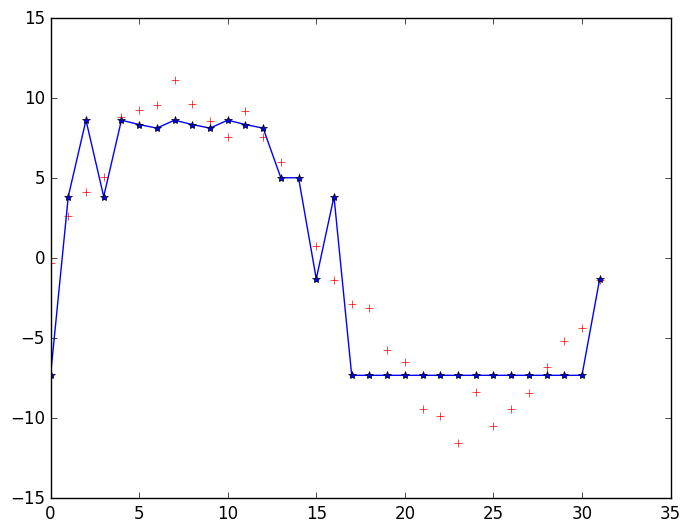

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0b8425ea10>

In [17]:
m1 = c[:m1][222];
s1 = c[:s1][222];
PyPlot.plot(y[1,:], linestyle="None", marker="+", color = "r")
PyPlot.plot(m1[s1], linestyle="-", marker="*", color = "b")